In [67]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import codecs

# MNIST

In [260]:
# top-1
with open("topk_log.txt") as f:
    l = f.readlines()
top1_labels = eval(l[1])
true_labels = eval(l[2])

## Top-1で間違えたインスタンスを記録

In [283]:
indexes = [i for i, (generated_l, true_l) in enumerate(zip(top1_labels, true_labels)) if (generated_l[0] != true_l)]
for_failed_true = [true_labels[i] for i in indexes]

In [284]:
# Tsallis
with open("tsallis_log.txt") as f:
    l = f.readlines()
vs = [i for i in range(1, 22, 2)]
tsallis_labels = [eval(l[v]) for v in vs] # generated labels
# true_labels = eval(l[20]) # true labels

## Top-1で間違えたインスタンスに対してTsallisが付与したラベル集合の精度を計算

In [285]:
for_failed_tsallis = []
for labels_set in tsallis_labels:
    for_failed_tsallis.append([labels_set[i] for i in indexes])

In [286]:
def acc_calc(l_set, for_failed_true):
    score = 0
    total_lnum = 0
    for labels, t_label in zip(l_set, for_failed_true):
        total_lnum += len(labels)
        if (t_label in labels):
            score += 1 
    return (total_lnum/len(for_failed_true), score*100/total_lnum)

In [287]:
acc_tsallis = [acc_calc(l_set, for_failed_true)[1] for l_set in for_failed_tsallis]
avelnum_tsallis = [acc_calc(l_set, for_failed_true)[0] for l_set in for_failed_tsallis]

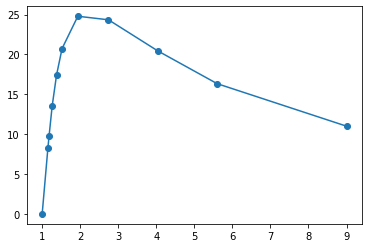

In [288]:
plt.figure()
plt.plot(avelnum_tsallis, acc_tsallis, marker = 'o')
plt.show()

## Top-1で間違えたインスタンスに対してTop-Rが付与したラベル

In [289]:
# top-r
with open("topr_log.txt") as f:
    l = f.readlines()
topr_indexes = [j for j in range(5, 30, 6)] + [j for j in range(36, 61, 6)] + [j for j in range(67, 92, 6)] + [j for j in range(98, 123, 6)]
topr_sets = [eval(l[i]) for i in topr_indexes]
top1_indexes = [j for j in range(7, 32, 6)] + [j for j in range(38, 63, 6)] + [j for j in range(69, 94, 6)] + [j for j in range(100, 125, 6)]
top1_sets = [eval(l[i]) for i in top1_indexes]
true_indexes = [j for j in range(9, 34, 6)] + [j for j in range(40, 65, 6)] + [j for j in range(71, 96, 6)] + [j for j in range(102, 127, 6)]
true_sets = [eval(l[i]) for i in true_indexes]

In [290]:
indexes_sets = [[i for i, (generated_l, true_l) in enumerate(zip(top1_labels, true_labels)) if (generated_l[0] != true_l)] for top1_labels, true_labels in zip(top1_sets, true_sets)]
for_failed_true_sets = [[true_labels[i] for i in true_indexes] for topr_labels, true_indexes in zip(topr_sets, indexes_sets)]

In [291]:
for_failed_topr_sets = []
for topr_labels, indexes in zip(topr_sets, indexes_sets):
    for_failed_topr_sets.append([topr_labels[i] for i in indexes])

In [292]:
acc_topr = [acc_calc(l_set, for_failed_true)[1] for l_set, for_failed_true in zip(for_failed_topr_sets, for_failed_true_sets)]
avelnum_topr = [acc_calc(l_set, for_failed_true)[0] for l_set in zip(for_failed_topr_sets, for_failed_true_sets)]

In [293]:
[(acc_topr[i] + acc_topr[i + 1] + acc_topr[i + 2] + acc_topr[i + 3] + acc_topr[i + 4])/5 for i in range(0, 16, 5)]

[9.688706362426277, 10.437230866759691, 10.35115734078952, 9.425212313660632]

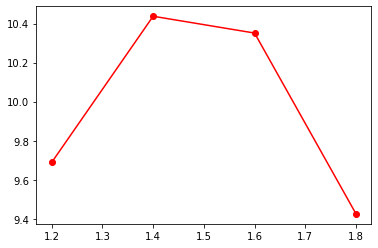

In [294]:
plt.figure()
plt.plot([1.2, 1.4, 1.6, 1.8], [9.688706362426277, 10.437230866759691, 10.35115734078952, 9.425212313660632], color = 'r', marker = 'o')
plt.show()

## Top-1で間違えたインスタンスを記録

In [295]:
# Top-1
with open("topk_log.txt") as f:
    l = f.readlines()
top1_labels = eval(l[1])
true_labels = eval(l[2])

In [296]:
indexes = [i for i, (generated_l, true_l) in enumerate(zip(top1_labels, true_labels)) if (generated_l[0] != true_l)]
for_failed_true = [true_labels[i] for i in indexes]

In [297]:
# Top-k
with open("topk_log.txt") as f:
    l = f.readlines()
vs = [i for i in range(1, 27, 3)]
topk_labels = [eval(l[v]) for v in vs] # generated labels

## Top-1で間違えたインスタンスに対してTop-kが付与したラベル集合の精度を計算

In [298]:
for_failed_topk = []
for labels_set in topk_labels:
    for_failed_topk.append([labels_set[i] for i in indexes])

In [299]:
acc_topk = [acc_calc(l_set, for_failed_true)[1] for l_set in for_failed_topk]
avelnum_topk = [acc_calc(l_set, for_failed_true)[0] for l_set in for_failed_topk]

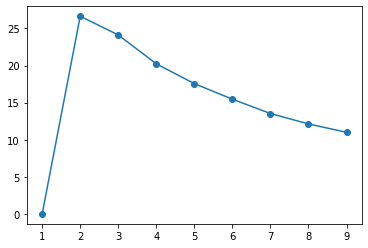

In [300]:
plt.figure()
plt.plot([i for i in range(1, 10)], acc_topk, marker = 'o')
plt.show()

In [301]:
acc_topk

[0.0,
 26.644736842105264,
 24.12280701754386,
 20.230263157894736,
 17.56578947368421,
 15.460526315789474,
 13.533834586466165,
 12.129934210526315,
 11.001461988304094]

In [302]:
acc_topk = acc_topk[:1] + [9.688706362426277, 10.437230866759691, 10.35115734078952, 9.425212313660632] + acc_topk[1:]

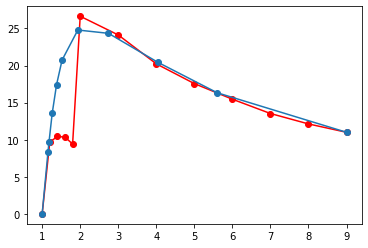

In [303]:
x = [1, 1.2, 1.4, 1.6, 1.8] + [i for i in range(2, 10)]
plt.figure()
plt.plot(x, acc_topk, color = 'r', marker = 'o')
plt.plot(avelnum_tsallis, acc_tsallis, marker = 'o')
plt.show()